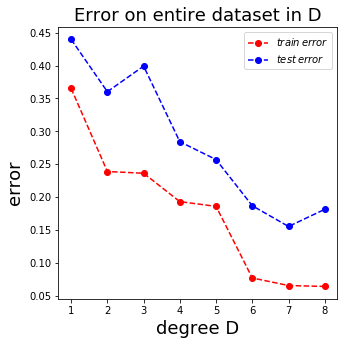

In [25]:
from __future__ import division
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split

# load data
def load_data():
    data = np.array(np.genfromtxt('C:/Users/10448/Desktop/wavy_data.csv', delimiter=','))
    x = np.reshape(data[:,0],(np.size(data[:,0]),1))
    y = np.reshape(data[:,1],(np.size(data[:,1]),1))
    return x,y

# Fourier features
def four_features(x,D):
    F = np.zeros((len(x),D+1))
    for i in range(len(x)):
        for j in range(D+1):
            if j%2 ==0:
                F[i,j] = np.cos(2*np.pi*((j+2)/2)*x[i])
            else:
                F[i,j] = np.sin(2*np.pi*((j+1)/2)*x[i])
    F = F.T

    return F

# plot train error and test error over all D tested 
def plot_error(train,test,deg):
    plt.plot(np.arange(1,np.size(train)+1),train,'ro--')
    plt.plot(np.arange(1,np.size(test)+1),test,'bo--')
    plt.title('Error on entire dataset in D', fontsize=18)
    plt.xlabel('degree D', fontsize=18)
    plt.ylabel('error       ', fontsize=18)
    plt.legend([r'$train\:error$',r'$test\:error$'])

# run over all the degrees and calculate errors
def try_all_degs(x,y,deg_range):
    
    # split data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=19)

    # generate train and test error features
    train_error = []
    test_error = []

    # calculate errors
    for D in np.arange(0,np.size(deg_range)):
        # generate fourier feature transformation
        F_train = four_features(x_train,deg_range[D])
        F_test = four_features(x_test,deg_range[D])

        # concatenate ones for F
        tr_o = np.ones((np.shape(F_train)[1],1))
        F_train_new = np.concatenate((tr_o,F_train.T),axis = 1)
        F_train_new = F_train_new.T
        te_o = np.ones((np.shape(F_test)[1],1))
        F_test_new = np.concatenate((te_o,F_test.T),axis = 1)
        F_test_new = F_test_new.T
        
        # get error
        temp_train = np.linalg.pinv(np.dot(F_train_new,F_train_new.T))
        w_train = np.dot(np.dot(temp_train,F_train_new),y_train)
        tr_error = np.linalg.norm(np.dot(F_train_new.T,w_train)-y_train)/np.size(y_train)
        temp_test = np.linalg.pinv(np.dot(F_test_new,F_test_new.T))
        w_test = w_train
        te_error = np.linalg.norm(np.dot(F_test_new.T,w_test)-y_test)/np.size(y_test)
        train_error.append(tr_error)
        test_error.append(te_error)

    # make plot of train and test errors
    fig = plt.figure(figsize = (5,5))
    plot_error(train_error,test_error,deg_range)
    plt.show()
    
# load data and defined degree range
x, y = load_data()
deg_range = [1,2,3,4,5,6,7,8]           # degree fourier to try

# run all over degree range
try_all_degs(x,y,deg_range)